<a href="https://colab.research.google.com/github/VijaySivak/Generalization-of-neural-networks-needs-rethinking/blob/main/Vijay_Sivakumar_Generalization_of_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
# STEP 2: Load and Normalize CIFAR-10 Dataset

transform = transforms.Compose([
    transforms.Resize(128),  # Resize CIFAR-10 images from 32x32 → 128x128
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 128

# Load Training and Test Datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# Class labels
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:13<00:00, 13.0MB/s]


In [ ]:
# STEP: Define AlexNet (modified for CIFAR-10)

from torchvision import models

class CIFAR10_AlexNet(nn.Module):
    def __init__(self):
        super(CIFAR10_AlexNet, self).__init__()
        self.model = models.alexnet(pretrained=False)
        self.model.classifier[6] = nn.Linear(4096, 10)  # Change output to 10 classes

    def forward(self, x):
        return self.model(x)

# Create model instance
alexnet_model = CIFAR10_AlexNet().to(device)
print(alexnet_model)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


CIFAR10_AlexNet(
  (model): AlexNet(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace=True)
      (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace=True)
      (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): ReLU(inplace=True)
      (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
    (classifier): Sequential(
      (0): Dropout(p=0.5, inplace=False)
 

In [ ]:
# STEP 4: Loss and Optimizer

model = CIFAR10_AlexNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

In [ ]:
# STEP 5: Train the Alex Net Model

import time  # Add this at the top of your notebook

def train(model, trainloader, testloader, epochs=40):
    train_acc_list = []
    test_acc_list = []

    for epoch in range(epochs):
        start_time = time.time()  # ⏱️ Start clock

        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_acc = 100. * correct / total
        train_acc_list.append(train_acc)

        # Evaluation
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in testloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

        test_acc = 100. * correct / total
        test_acc_list.append(test_acc)

        epoch_time = time.time() - start_time  # ⏱️ End clock

        print(f"Epoch {epoch+1}: Train Acc: {train_acc:.2f}% | Test Acc: {test_acc:.2f}% | Time: {epoch_time:.2f}s")

    return train_acc_list, test_acc_list

# Run the training
train_accs, test_accs = train(model, trainloader, testloader, epochs=40)

Epoch 1: Train Acc: 38.97% | Test Acc: 52.53% | Time: 59.48s
Epoch 2: Train Acc: 59.04% | Test Acc: 62.93% | Time: 52.12s
Epoch 3: Train Acc: 67.03% | Test Acc: 68.76% | Time: 52.65s
Epoch 4: Train Acc: 72.15% | Test Acc: 72.79% | Time: 52.29s
Epoch 5: Train Acc: 76.14% | Test Acc: 72.02% | Time: 52.06s
Epoch 6: Train Acc: 79.14% | Test Acc: 72.96% | Time: 52.41s
Epoch 7: Train Acc: 82.05% | Test Acc: 75.62% | Time: 52.49s
Epoch 8: Train Acc: 84.05% | Test Acc: 75.22% | Time: 52.40s
Epoch 9: Train Acc: 85.87% | Test Acc: 75.92% | Time: 52.41s
Epoch 10: Train Acc: 87.44% | Test Acc: 75.63% | Time: 53.05s
Epoch 11: Train Acc: 89.20% | Test Acc: 76.70% | Time: 53.43s
Epoch 12: Train Acc: 90.81% | Test Acc: 76.10% | Time: 52.12s
Epoch 13: Train Acc: 91.48% | Test Acc: 76.45% | Time: 51.78s
Epoch 14: Train Acc: 92.62% | Test Acc: 76.33% | Time: 51.81s
Epoch 15: Train Acc: 93.21% | Test Acc: 76.69% | Time: 51.84s
Epoch 16: Train Acc: 93.94% | Test Acc: 77.12% | Time: 51.82s
Epoch 17: Train A

In [ ]:
# STEP 6: Plot Training and Test Accuracy

plt.figure(figsize=(10, 5))
plt.plot(train_accs, label='Train Accuracy')
plt.plot(test_accs, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training vs Test Accuracy on CIFAR-10')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# STEP 7: Randomize Training Labels

import copy
import random

# Copy the original training dataset so we don't destroy it
randomized_trainset = copy.deepcopy(trainset)

# Replace labels with random labels
num_classes = 10
random_labels = [random.randint(0, num_classes - 1) for _ in range(len(randomized_trainset.targets))]
randomized_trainset.targets = random_labels

# New dataloader for randomized data
random_trainloader = torch.utils.data.DataLoader(randomized_trainset, batch_size=batch_size, shuffle=True, num_workers=2)

In [ ]:
print("Sample labels after randomization:", randomized_trainset.targets[:20])

Sample labels after randomization: [0, 4, 9, 3, 2, 5, 4, 3, 6, 9, 5, 3, 4, 9, 6, 5, 5, 5, 5, 5]


In [ ]:
# STEP 8: Train on Random Labels

# Re-initialize the model from scratch
model_random_labels = CIFAR10_AlexNet().to(device)

# Reuse the same loss and optimizer
optimizer = optim.SGD(model_random_labels.parameters(), lr=0.01, momentum=0.9)

# Train
train_accs_rand, test_accs_rand = train(model_random_labels, random_trainloader, testloader, epochs=100)

Epoch 1: Train Acc: 10.04% | Test Acc: 10.00% | Time: 47.92s
Epoch 2: Train Acc: 9.83% | Test Acc: 10.00% | Time: 46.74s
Epoch 3: Train Acc: 10.21% | Test Acc: 10.00% | Time: 48.16s
Epoch 4: Train Acc: 10.02% | Test Acc: 10.11% | Time: 47.97s
Epoch 5: Train Acc: 9.96% | Test Acc: 10.00% | Time: 48.02s
Epoch 6: Train Acc: 10.00% | Test Acc: 10.00% | Time: 46.94s
Epoch 7: Train Acc: 10.17% | Test Acc: 10.00% | Time: 47.86s
Epoch 8: Train Acc: 10.15% | Test Acc: 10.00% | Time: 47.72s
Epoch 9: Train Acc: 10.07% | Test Acc: 10.00% | Time: 46.82s
Epoch 10: Train Acc: 10.05% | Test Acc: 9.68% | Time: 47.99s
Epoch 11: Train Acc: 10.10% | Test Acc: 10.00% | Time: 47.64s
Epoch 12: Train Acc: 10.13% | Test Acc: 10.00% | Time: 47.36s
Epoch 13: Train Acc: 9.98% | Test Acc: 10.00% | Time: 47.88s
Epoch 14: Train Acc: 10.08% | Test Acc: 10.05% | Time: 47.73s
Epoch 15: Train Acc: 10.18% | Test Acc: 9.99% | Time: 47.19s
Epoch 16: Train Acc: 10.13% | Test Acc: 10.00% | Time: 47.57s
Epoch 17: Train Acc: 9

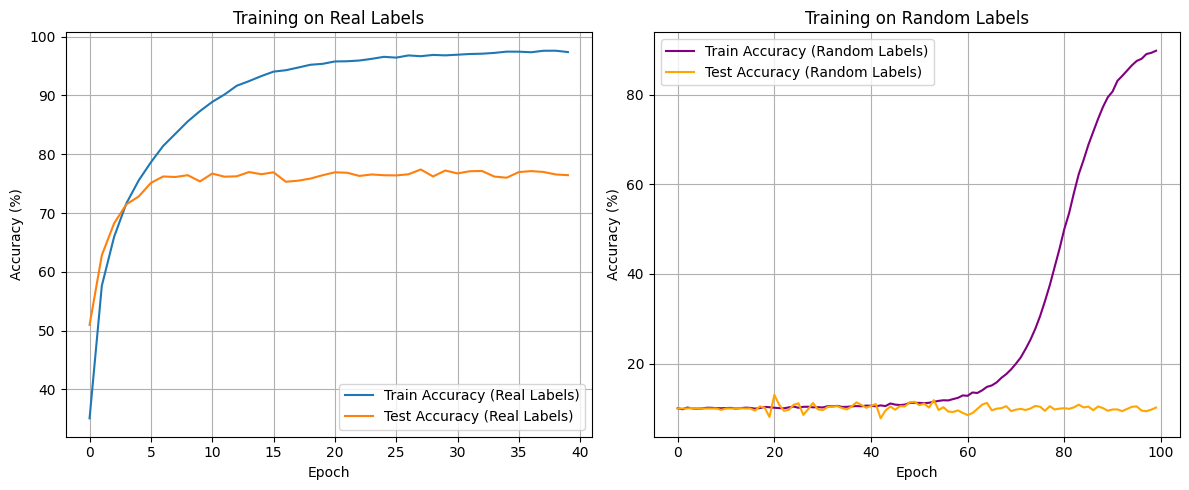

In [ ]:
# STEP 9: Compare Training on Real vs Random Labels

plt.figure(figsize=(12, 5))

# Subplot 1: Real labels
plt.subplot(1, 2, 1)
plt.plot(train_accs, label='Train Accuracy (Real Labels)')
plt.plot(test_accs, label='Test Accuracy (Real Labels)')
plt.title('Training on Real Labels')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

# Subplot 2: Random labels
plt.subplot(1, 2, 2)
plt.plot(train_accs_rand, label='Train Accuracy (Random Labels)', color='purple')
plt.plot(test_accs_rand, label='Test Accuracy (Random Labels)', color='orange')
plt.title('Training on Random Labels')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# STEP 10: Create Random Input (Gaussian Noise) Dataset

import torch.utils.data as data

class GaussianNoiseDataset(data.Dataset):
    def __init__(self, original_dataset):
        self.targets = original_dataset.targets
        self.length = len(self.targets)

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        # Create random noise image of size 3×128×128 instead of 3×32×32
        # Generate noise in [0, 1] and normalize it the same way as CIFAR-10
        random_image = (torch.randn(3, 128, 128) * 0.5 + 0.5 - 0.5) / 0.5
        label = self.targets[idx]
        return random_image, label

# Create dataset and dataloader
noise_dataset = GaussianNoiseDataset(trainset)
noise_loader = data.DataLoader(noise_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

In [ ]:
# STEP 11: Train Alex net on Random Noise Inputs

model_noise_inputs = CIFAR10_AlexNet().to(device)
optimizer = optim.Adam(model_noise_inputs.parameters(), lr=0.001)

# Train the model on noise input data
train_accs_noise, test_accs_noise = train(model_noise_inputs, noise_loader, testloader, epochs=100)

Epoch 1: Train Acc: 9.92% | Test Acc: 10.00% | Time: 43.12s
Epoch 2: Train Acc: 9.91% | Test Acc: 10.00% | Time: 44.06s
Epoch 3: Train Acc: 9.94% | Test Acc: 10.00% | Time: 43.10s
Epoch 4: Train Acc: 9.58% | Test Acc: 10.00% | Time: 42.92s
Epoch 5: Train Acc: 9.84% | Test Acc: 10.00% | Time: 43.41s
Epoch 6: Train Acc: 9.66% | Test Acc: 10.00% | Time: 43.49s
Epoch 7: Train Acc: 9.79% | Test Acc: 10.00% | Time: 43.18s
Epoch 8: Train Acc: 9.56% | Test Acc: 10.00% | Time: 43.80s
Epoch 9: Train Acc: 9.96% | Test Acc: 10.00% | Time: 42.98s
Epoch 10: Train Acc: 9.76% | Test Acc: 10.00% | Time: 43.03s
Epoch 11: Train Acc: 9.89% | Test Acc: 10.00% | Time: 43.97s
Epoch 12: Train Acc: 9.81% | Test Acc: 10.00% | Time: 42.66s
Epoch 13: Train Acc: 9.70% | Test Acc: 10.00% | Time: 43.07s
Epoch 14: Train Acc: 9.66% | Test Acc: 10.00% | Time: 42.96s
Epoch 15: Train Acc: 9.87% | Test Acc: 10.00% | Time: 42.93s
Epoch 16: Train Acc: 9.76% | Test Acc: 10.00% | Time: 43.31s
Epoch 17: Train Acc: 9.81% | Test

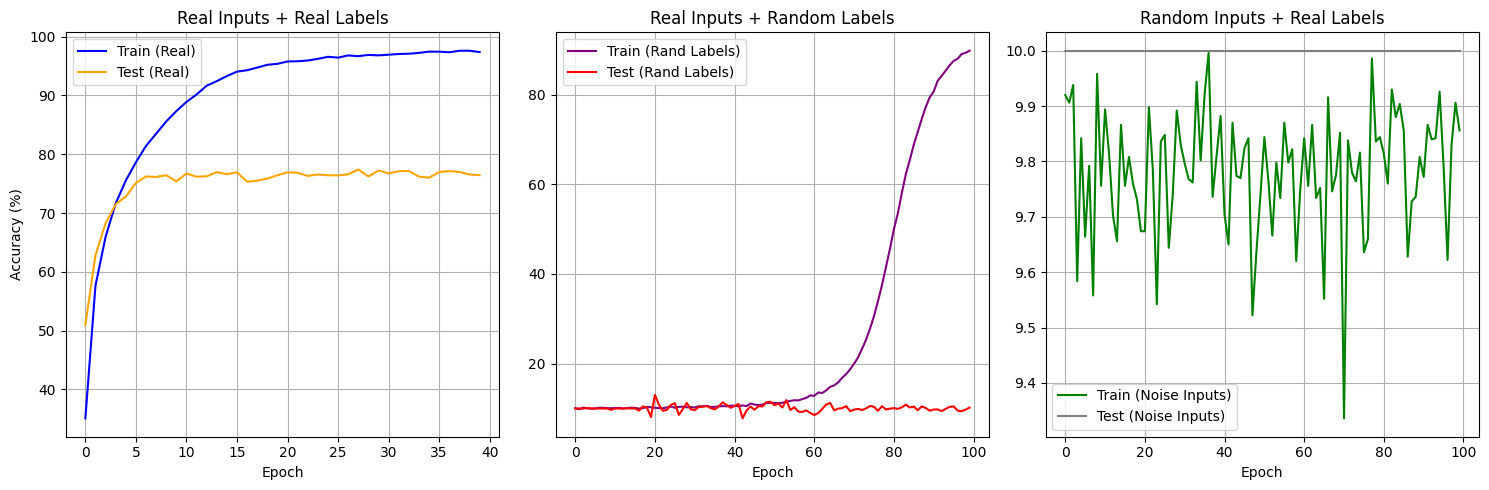

In [ ]:
# STEP 12: Plot comparison of all 3 experiments

plt.figure(figsize=(15, 5))

# Plot: Real Inputs & Labels
plt.subplot(1, 3, 1)
plt.plot(train_accs, label='Train (Real)', color='blue')
plt.plot(test_accs, label='Test (Real)', color='orange')
plt.title("Real Inputs + Real Labels")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)

# Plot: Real Inputs + Random Labels
plt.subplot(1, 3, 2)
plt.plot(train_accs_rand, label='Train (Rand Labels)', color='purple')
plt.plot(test_accs_rand, label='Test (Rand Labels)', color='red')
plt.title("Real Inputs + Random Labels")
plt.xlabel("Epoch")
plt.legend()
plt.grid(True)

# Plot: Random Inputs + Real Labels
plt.subplot(1, 3, 3)
plt.plot(train_accs_noise, label='Train (Noise Inputs)', color='green')
plt.plot(test_accs_noise, label='Test (Noise Inputs)', color='gray')
plt.title("Random Inputs + Real Labels")
plt.xlabel("Epoch")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# STEP 13: Alex net with Dropout

from torchvision import models

class AlexWithDropout(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super(AlexWithDropout, self).__init__()
        self.model = models.alexnet(pretrained=False)

        # Modify dropout layers and classifier
        self.model.classifier = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout_rate),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 10)
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
# Train Alex net with Dropout on Real Data

model_dropout = AlexWithDropout(dropout_rate=0.5).to(device)
optimizer = optim.Adam(model_dropout.parameters(), lr=0.0005)  # No weight decay yet

train_accs_dropout, test_accs_dropout = train(model_dropout, trainloader, testloader, epochs=30)

Epoch 1: Train Acc: 35.22% | Test Acc: 50.77% | Time: 49.06s
Epoch 2: Train Acc: 55.66% | Test Acc: 60.21% | Time: 48.81s
Epoch 3: Train Acc: 64.01% | Test Acc: 66.36% | Time: 48.20s
Epoch 4: Train Acc: 69.60% | Test Acc: 70.51% | Time: 48.87s
Epoch 5: Train Acc: 73.84% | Test Acc: 72.74% | Time: 49.01s
Epoch 6: Train Acc: 77.27% | Test Acc: 73.56% | Time: 48.16s
Epoch 7: Train Acc: 80.14% | Test Acc: 74.01% | Time: 47.84s
Epoch 8: Train Acc: 82.73% | Test Acc: 74.78% | Time: 48.36s
Epoch 9: Train Acc: 84.72% | Test Acc: 74.48% | Time: 48.72s
Epoch 10: Train Acc: 86.77% | Test Acc: 73.93% | Time: 49.43s
Epoch 11: Train Acc: 88.51% | Test Acc: 74.51% | Time: 49.51s
Epoch 12: Train Acc: 89.91% | Test Acc: 75.32% | Time: 49.32s
Epoch 13: Train Acc: 90.89% | Test Acc: 75.90% | Time: 48.15s
Epoch 14: Train Acc: 92.04% | Test Acc: 74.84% | Time: 48.90s
Epoch 15: Train Acc: 93.07% | Test Acc: 75.16% | Time: 49.15s
Epoch 16: Train Acc: 93.69% | Test Acc: 74.13% | Time: 48.98s
Epoch 17: Train A

In [ ]:
# STEP 14: ALEX net with Dropout + Weight Decay

model_dropout_wd = AlexWithDropout(dropout_rate=0.5).to(device)

# Use weight_decay in the optimizer (L2 regularization)
optimizer = optim.Adam(model_dropout_wd.parameters(), lr=0.0005, weight_decay=5e-4)

train_accs_dropout_wd, test_accs_dropout_wd = train(model_dropout_wd, trainloader, testloader, epochs=30)

Epoch 1: Train Acc: 32.41% | Test Acc: 47.06% | Time: 49.21s
Epoch 2: Train Acc: 53.55% | Test Acc: 59.52% | Time: 49.67s
Epoch 3: Train Acc: 62.39% | Test Acc: 64.18% | Time: 49.28s
Epoch 4: Train Acc: 67.89% | Test Acc: 69.53% | Time: 48.56s
Epoch 5: Train Acc: 71.97% | Test Acc: 72.69% | Time: 49.64s
Epoch 6: Train Acc: 75.01% | Test Acc: 72.51% | Time: 49.73s
Epoch 7: Train Acc: 77.96% | Test Acc: 73.44% | Time: 49.07s
Epoch 8: Train Acc: 79.36% | Test Acc: 75.05% | Time: 49.77s
Epoch 9: Train Acc: 81.54% | Test Acc: 75.31% | Time: 49.65s
Epoch 10: Train Acc: 83.49% | Test Acc: 77.17% | Time: 48.81s
Epoch 11: Train Acc: 84.62% | Test Acc: 76.86% | Time: 49.06s
Epoch 12: Train Acc: 86.26% | Test Acc: 76.87% | Time: 49.20s
Epoch 13: Train Acc: 87.19% | Test Acc: 76.72% | Time: 49.86s
Epoch 14: Train Acc: 88.06% | Test Acc: 77.70% | Time: 48.94s
Epoch 15: Train Acc: 89.34% | Test Acc: 77.48% | Time: 49.49s
Epoch 16: Train Acc: 89.95% | Test Acc: 77.40% | Time: 49.66s
Epoch 17: Train A

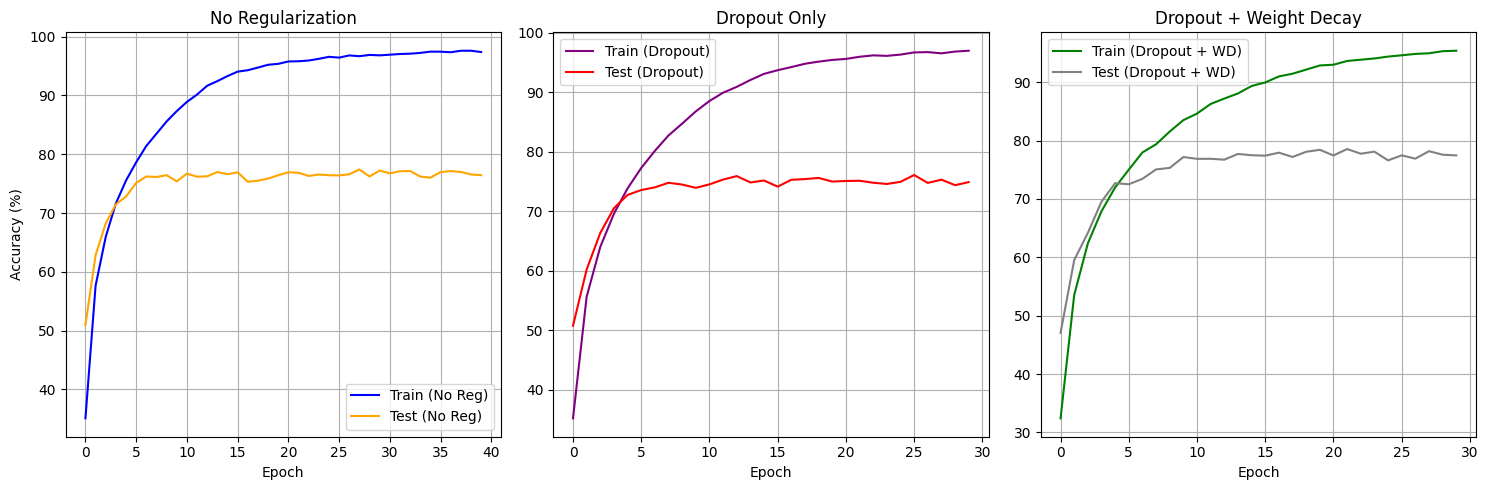

In [ ]:
# STEP 15: Plot Regularization Effects

plt.figure(figsize=(15, 5))

# No Regularization
plt.subplot(1, 3, 1)
plt.plot(train_accs, label='Train (No Reg)', color='blue')
plt.plot(test_accs, label='Test (No Reg)', color='orange')
plt.title('No Regularization')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

# Dropout
plt.subplot(1, 3, 2)
plt.plot(train_accs_dropout, label='Train (Dropout)', color='purple')
plt.plot(test_accs_dropout, label='Test (Dropout)', color='red')
plt.title('Dropout Only')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

# Dropout + Weight Decay
plt.subplot(1, 3, 3)
plt.plot(train_accs_dropout_wd, label='Train (Dropout + WD)', color='green')
plt.plot(test_accs_dropout_wd, label='Test (Dropout + WD)', color='gray')
plt.title('Dropout + Weight Decay')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()